# **Mall Customers Data**
### We are trying to make sense of this data, Predict the new customers spending rate ( Haw much they will spend on products ), cluster the customers into groups to be able to predict thier actions and to understand what segment of people are the most valuable to the business

- We will visualize the data to try to idintify patterns, 
- Then implement k-means to segment the customers, 
- After that we study the attitude of each segment 
- We implement xgboost before the clustering and after it to see the difference
- conclusion



## Steps
    - load the data
    - discribe the data 
    - visualize 
    - get insights
    - k-means my implementation
    - k-means from sklearn
    - using xgboost before clustering
    - using xgboost after clustering
    - conclusion

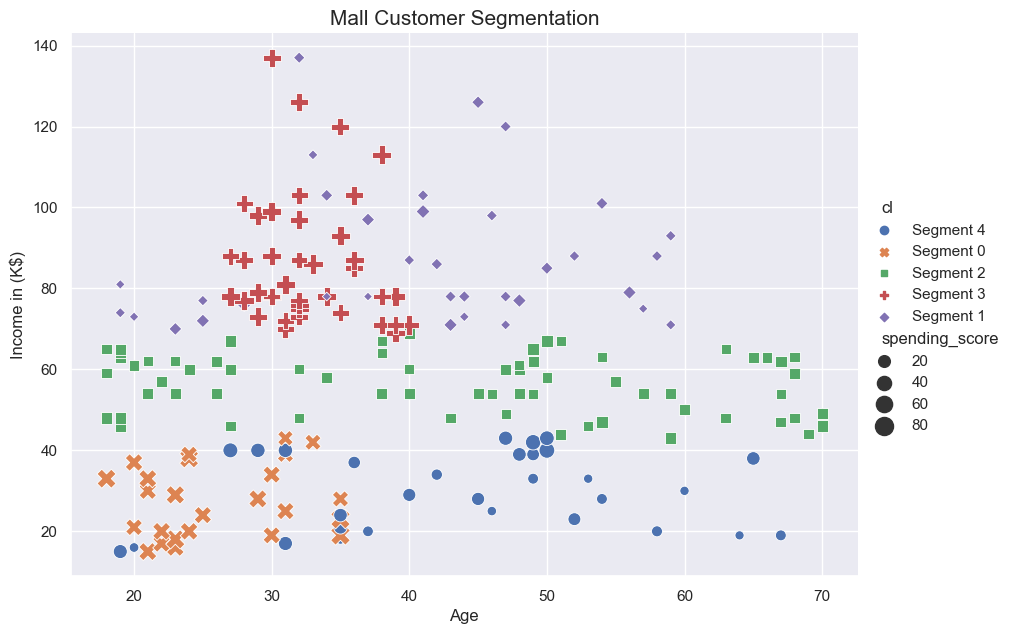

# Initiate, load and discribe data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

from sklearn import preprocessing
from sklearn.preprocessing import  LabelEncoder



In [ ]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
display(data.head(),data.columns)

In [ ]:
data.columns = ['id', 'gender','age','income_in_k','spending_score']
data

In [ ]:
data.info()

In [ ]:
data.describe()

# Visualize

In [ ]:
col= ['sandybrown','royalblue']
data.groupby(['gender']).count().loc[:,'id'].plot.pie(title="The amount of each gender in the data",colors = col, ylabel =None,explode = [0.05,0.1],shadow=True)



We have more females the male in the data

In [ ]:
data_grouped_by_gender =data.groupby(['gender']).mean()
data_grouped_by_gender.loc[:,['income_in_k','spending_score']].plot(kind='bar',title="The Average Income in (K$)",figsize=(10,7))

In [ ]:
(data_grouped_by_gender['spending_score']/data_grouped_by_gender['income_in_k']).plot.bar(color=col,title = 'Spent amount to income')

Although men tend to have more income, they also tend to spend less 

In [ ]:
data.income_in_k.plot.hist(bins=50,figsize=(8,8),title= 'Income Histogram')

In [ ]:

sns.set_theme()

b =sns.relplot(
    data=data,
    x="age", y="income_in_k",
    hue="gender", style="gender", size="spending_score",aspect=11.7/8.27, height=6.27, sizes=(50, 100)
)
b.set(title= "Mall Customer Purchases")
plt.xlabel('Age', fontsize=12);
plt.ylabel('Income in (K$)', fontsize=12);
plt.title( "Mall Customer Purchases", fontsize=15)
# b.axes.set_title("Title",fontsize=50)



In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data = data ,fill=True, x="income_in_k", y="spending_score", kind='kde',cmap="gist_earth");
    
plt.show()
sns.kdeplot(
    data=data, x="income_in_k", y="spending_score",
    fill=True, thresh=0, levels=100, cmap="mako",
)

## Changing gender column to numerical
Male to 1 and female to 0

In [ ]:
gender_encoder = LabelEncoder()
data['gender_num'] = gender_encoder.fit_transform(data['gender'])
data_num = data.drop('gender',axis=1)
display(data.head())

In [ ]:
sns.pairplot(data_num)
plt.show()


In [ ]:

ax = sns.heatmap (data_num.corr(), annot=True, fmt=".2f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

# K-means
### My Implementation

The Functions

In [ ]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)
    
    idx_full = np.zeros([X.shape[0],X.shape[1], K], dtype='float32')
    idx_calc = np.zeros([X.shape[0], K], dtype='float32')
    
    print(idx_full.shape)

    ### START CODE HERE ###
    for i in range(K):

        idx_full[:,:,i]= X-centroids[i]
        idx_calc[:,i] = np.sqrt(np.power(idx_full[:,1,i],2)+ np.power(idx_full[:,0,i],2))

#         idx_calc[:,i] = np.linalg.norm(X[i] - centroids[j]) 
        

        
    for i in range(len(X)):
#         idx[i] = np.where(idx_calc[i]==np.min(idx_calc[i]))[0][0]
        
        idx[i] = np.argmin(idx_calc[i])

        
            
            
        
     ### END CODE HERE ###
    
    return idx
# UNQ_C2
# GRADED FUNCTION: compute_centpods

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    cent_distances = np.array([X[idx == i] for i in range(K) ])
    
    for ind,cent in enumerate (cent_distances):
        for i in range(cent.shape[1]):
            centroids[ind,i] = np.mean(cent[:,i])
        

    ### END CODE HERE ## 
    
    return centroids

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx




# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

### Trying out the functions

In [ ]:
X=data_num.to_numpy()
X[0:5]

In [ ]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[10]*5, [20]*5, [60]*5])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])


In [ ]:
set(idx)

In [ ]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

In [ ]:
plt.scatter(x=X[:,2],y=X[:,3])
plt.scatter(centroids[:,2],centroids[:,3],c='r',s=70)
plt.legend(['Data',"Centroids"])
plt.xlabel("income in k$")
plt.ylabel("Spending Score")

In [ ]:
c_idx = np.array(['g','r','b'])[idx]
plt.scatter(x=X[idx ==0,2],y=X[idx ==0,3],c= c_idx[idx ==0])
plt.scatter(x=X[idx ==1,2],y=X[idx ==1,3],c= c_idx[idx ==1])
plt.scatter(x=X[idx ==2,2],y=X[idx ==2,3],c= c_idx[idx ==2])

plt.xlabel("income in k$")
plt.ylabel("Spending Score")
plt.legend(['Cent 1',"Cent 2",'Cent 3'])

In [ ]:
# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters)

In [ ]:
c_idx = np.array(['g','r','b'])[idx]
plt.scatter(x=X[idx ==0,2],y=X[idx ==0,3],c= c_idx[idx ==0])
plt.scatter(x=X[idx ==1,2],y=X[idx ==1,3],c= c_idx[idx ==1])
plt.scatter(x=X[idx ==2,2],y=X[idx ==2,3],c= c_idx[idx ==2])

plt.xlabel("income in k$")
plt.ylabel("Spending Score")
plt.legend(['Cent 1',"Cent 2",'Cent 3'])

## Now lets see 5 segments

In [ ]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 5                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X, initial_centroids, max_iters) 
c_idx = np.array(['tab:purple','tab:brown','tab:pink','tab:gray','tab:olive'])[idx]
plt.scatter(x=X[idx ==0,2],y=X[idx ==0,3],c= c_idx[idx ==0])
plt.scatter(x=X[idx ==1,2],y=X[idx ==1,3],c= c_idx[idx ==1])
plt.scatter(x=X[idx ==2,2],y=X[idx ==2,3],c= c_idx[idx ==2])
plt.scatter(x=X[idx ==3,2],y=X[idx ==3,3],c= c_idx[idx ==3])
plt.scatter(x=X[idx ==4,2],y=X[idx ==4,3],c= c_idx[idx ==4])
plt.xlabel("income in k$")
plt.ylabel("Spending Score")
plt.legend(['Cent 1',"Cent 2",'Cent 3',"Cent 4",'Cent 5'])

In [ ]:
c_idx = np.array(['tab:purple','tab:brown','tab:pink','tab:gray','tab:olive'])[idx]

plt.scatter(data_num['age'], data_num['spending_score'], c=c_idx)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

Un able to cassify all the segment accuratly

### Not a great result

# Sklearn K-Means

In [ ]:
from sklearn.cluster import KMeans
data_num.head()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_num)

In [ ]:
color_map= np.array(['tab:purple','tab:brown','tab:pink','tab:gray','tab:olive'])
c_idx = color_map[kmeans.labels_]



plt.scatter(data_num['income_in_k'], data_num['spending_score'], c=c_idx)
plt.xlabel("income in k$")
plt.ylabel("Spending Score")
plt.show()
map_color =list(zip(color_map,range(0,5)))

display(map_color)

#### Big Difference,
Seams that it idintified all the segments right

In [ ]:
c_idx = np.array(['tab:purple','tab:brown','tab:pink','tab:gray','tab:olive'])[kmeans.labels_]

plt.scatter(data_num['age'], data_num['spending_score'], c=c_idx)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

# Using k-means results

In [ ]:
data_clustered = data.copy()
data_clustered['cl']=  [f'Segment {i}' for i in  kmeans.labels_]
data_clustered.head()


In [ ]:
grouped_cl_data = data_clustered.groupby(['cl']).mean()
grouped_cl_data.drop(['id','gender_num'],axis=1).plot.bar()


In [ ]:
b =sns.relplot(
    data=data_clustered,
    x="age", y="income_in_k",
    hue="cl", style="cl", size="spending_score",aspect=11.7/8.27, height=6.27, sizes=(40, 200)

)

plt.xlabel('Age', fontsize=12);
plt.ylabel('Income in (K$)', fontsize=12);
plt.title( "Mall Customer Segmentation", fontsize=15)
plt.show()



In [ ]:
data_clustered.loc[:,['id','cl']].groupby(['cl']).count().plot.pie(subplots=True,explode =[0.1,0.05,0.1,0.05,0],shadow=True)

# Random Forest 
##### I will use XGBoost 

I will try it on before segmentation and after

In [ ]:
# evaluate an xgboost regression model 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold,train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from numpy import absolute

from xgboost import XGBRegressor

In [ ]:
data_with_cl = data_num.copy()
data_with_cl['cl']=  kmeans.labels_
data_with_cl.head()

In [ ]:
data_num.head()

In [ ]:
# split data into input and output columns
X, y = data_num.drop(['spending_score'],axis=1), data_num.loc[:,'spending_score']
X2, y2 = data_with_cl.drop(['spending_score'],axis=1)    , data_with_cl.loc[:,'spending_score']

# define model
model = XGBRegressor()
model2 = XGBRegressor()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE Of the Model Without knowing the cluster: %.3f (%.3f)' % (scores.mean(), scores.std()),'\n' )


# evaluate model
scores2 = cross_val_score(model2, X2, y2, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores2 = absolute(scores2)
print('Mean MAE Of the Model With The Cluster Column: %.3f (%.3f)' % (scores2.mean(), scores2.std()) )

##### Mean MAE Of the Model Without knowing the cluster: 17.554 (3.706)
##### Mean MAE Of the Model With The Cluster Column: 9.695 (1.714)

## Huge Differance almost 100% increace in precession

In [ ]:
xtr,xts,ytr,yts  =  train_test_split(X, y)
xtr2,xts2,ytr2,yts2  =  train_test_split(X2, y2)

In [ ]:
model.fit(xtr, ytr)
model2.fit(xtr2, ytr2)

In [ ]:
y_hat=model.predict(xts)
y_hat2=model2.predict(xts2)

print("Mean Square Error Without:",mean_squared_error(y_hat,yts))
print("Mean Square Error With:",mean_squared_error(y_hat2,yts2))

print("R2 Score Without:",r2_score(y_hat,yts))
print("R2 Score With:",r2_score(y_hat2,yts2))


In [ ]:
y_hat=model.predict(X)
y_hat2=model2.predict(X2)

In [ ]:

amout_to_draw = 40
start= 30
plt.scatter(X.id[start:amout_to_draw], y[start:amout_to_draw],c='b',s=200)
plt.scatter(X.id[start:amout_to_draw], y_hat[start:amout_to_draw],c='r')
plt.scatter(X.id[start:amout_to_draw], y_hat2[start:amout_to_draw],c='g')
plt.xlabel("ID")
plt.ylabel("Spending Score")
plt.legend(["Read Data","Predction Without Clustering","Predction With Clustering"])
plt.show()


# **Conclusion**

- When the model got trained on the clusters data it got more knowledge about the attitude of the person so it's easier to predict his actions
- The cluster idintifies the people based on all thier features so it finds the most similar people and their actions
- K-means is very useful to cluster data and try to increase the features to use a model or anything
- The way we implemented is only one of many ways to use k-means  